In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [5]:
df = pd.read_csv('project_cleaned_V1.0.csv')

In [6]:
df['state'] = df['state'].fillna('N/A')

In [7]:
df['city'] = df['city'].fillna('Not Specified')

In [8]:
df.head()

,timestamp,age_group,industry,job_title,annual_salary_usd,compensation_usd,currency,country,state,city,overall_exp,field_exp,degree,gender,job_category,level,year,month,age_numeric
0,2021-04-27 11:02:10,25-34,Education,Research And Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,6.0,6.0,Masters,Woman,Management,Not Classified,2021,4,29.5
1,2021-04-27 11:02:22,25-34,Technology & IT,Change & Internal Communications Manager,72897.0,5340.0,GBP,United Kingdom,N/A,Cambridge,9.0,6.0,College,Man,Management,Not Classified,2021,4,29.5
2,2021-04-27 11:02:38,25-34,Finance,Marketing Specialist,34000.0,0.0,USD,United States,Tennessee,Chattanooga,3.0,3.0,College,Woman,Marketing & Sales,Not Classified,2021,4,29.5
3,2021-04-27 11:02:41,25-34,Non-Profit Organization,Program Manager,62000.0,3000.0,USD,United States,Wisconsin,Milwaukee,9.0,6.0,College,Woman,Management,Not Classified,2021,4,29.5
4,2021-04-27 11:02:42,25-34,Finance,Accounting Manager,60000.0,7000.0,USD,United States,South Carolina,Greenville,9.0,6.0,College,Woman,Management,Not Classified,2021,4,29.5


In [9]:
# If you want to see full numbers without e+, you can do:
pd.set_option('display.float_format', '{:,.2f}'.format)
df['annual_salary_usd'].describe()

count          28,727.00
mean          236,149.84
std        25,285,788.31
min                 0.00
25%            52,100.00
50%            73,000.00
75%           105,000.00
max     4,285,764,286.00
Name: annual_salary_usd, dtype: float64

### Data has huge Outliers

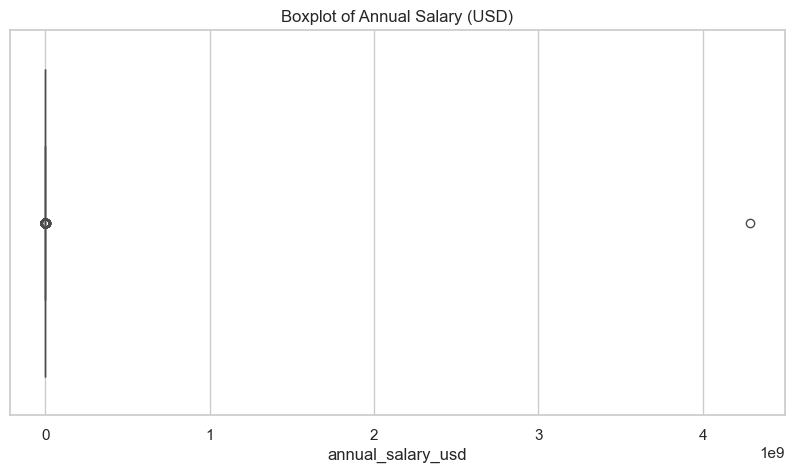

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['annual_salary_usd'])
plt.title("Boxplot of Annual Salary (USD)")
plt.show()

### as seen in the boxplot huge outlier on the right 

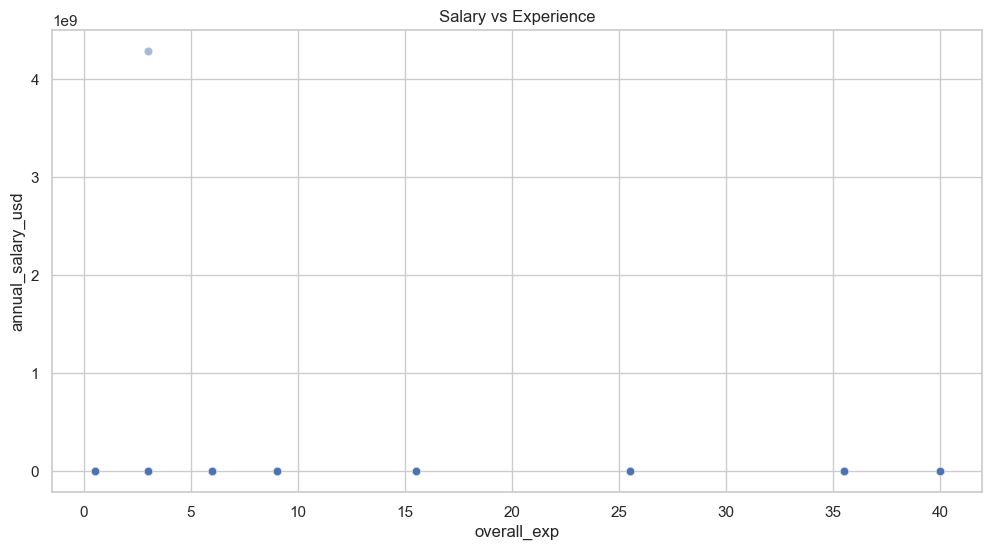

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    x='overall_exp',
    y='annual_salary_usd',
    data=df,
    alpha=0.5
)
plt.title("Salary vs Experience")
plt.show()

### as there is one huge outlier we will delete the max outlier and plot again

In [171]:
df_raw = df.copy()

In [12]:
# See the extremes
print(df['annual_salary_usd'].describe())

# Check lowest salaries
print("\nLowest 20 salaries:")
print(df.nsmallest(20, 'annual_salary_usd')[['annual_salary_usd', 'job_title', 'overall_exp', 'country']])

# Check highest salaries  
print("\nHighest 20 salaries:")
print(df.nlargest(20, 'annual_salary_usd')[['annual_salary_usd', 'job_title', 'overall_exp', 'country']])

count          28,727.00
mean          236,149.84
std        25,285,788.31
min                 0.00
25%            52,100.00
50%            73,000.00
75%           105,000.00
max     4,285,764,286.00
Name: annual_salary_usd, dtype: float64

Lowest 20 salaries:
       annual_salary_usd                      job_title  overall_exp  \
8962                0.00                       "Mum" ;)        25.50   
10614               0.00             Executive Director        15.50   
12900               0.00                       Attorney        15.50   
13837               0.00                Student Teacher         3.00   
15567               0.00               Product Marketer         0.50   
15666               0.00                   Househusband         6.00   
20612               0.00                        Founder        25.50   
20874               0.00                     Unemployed        25.50   
23472               0.00  Government Relations Director         9.00   
24436              

In [ ]:
# from analyzing the data 
# I will keep minimum salary 15000 and maximum 500000usd
df_clean  = df[(df['annual_salary_usd'] >= 15000) & 
                (df['annual_salary_usd'] <= 500000)].copy()

df_clean = df_clean[df_clean['year'] == 2021].copy()
# filtering only to 2021 values because 98% of the values are from 2021

In [14]:
original_count = len(df)

cleaned_count = len(df_clean)

remove_count = original_count - cleaned_count

percentage = (remove_count/original_count)*100

print(f"Original: {original_count} rows")
print(f"Cleaned: {cleaned_count} rows")
print(f"Removed: {remove_count} rows ({percentage:.1f}%)")

Original: 28727 rows
Cleaned: 28306 rows
Removed: 421 rows (1.5%)


In [15]:
# Look at the 135 high bonus rows
high_bonuses = df_clean[df_clean['compensation_usd'] > 200000]['compensation_usd']
print(high_bonuses.describe())
print("\nTop 10 highest bonuses:")
print(high_bonuses.sort_values(ascending=False).head(10).values)


count         135.00
mean      421,156.69
std       282,687.70
min       200,267.00
25%       247,750.00
50%       303,571.00
75%       480,000.00
max     1,500,000.00
Name: compensation_usd, dtype: float64

Top 10 highest bonuses:
[1500000. 1400000. 1400000. 1335113. 1335113. 1200000. 1200000. 1000000.
 1000000.  900000.]


In [16]:
df_clean = df_clean[df_clean['compensation_usd'] <= 300000].copy()

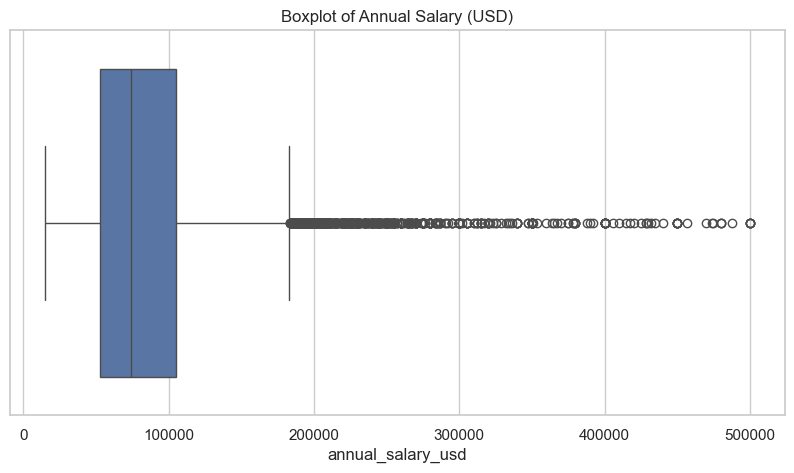

In [127]:
# Now let's check again 
plt.figure(figsize=(10,5))
sns.boxplot(x=df_clean['annual_salary_usd'])
plt.title("Boxplot of Annual Salary (USD)")
plt.show()


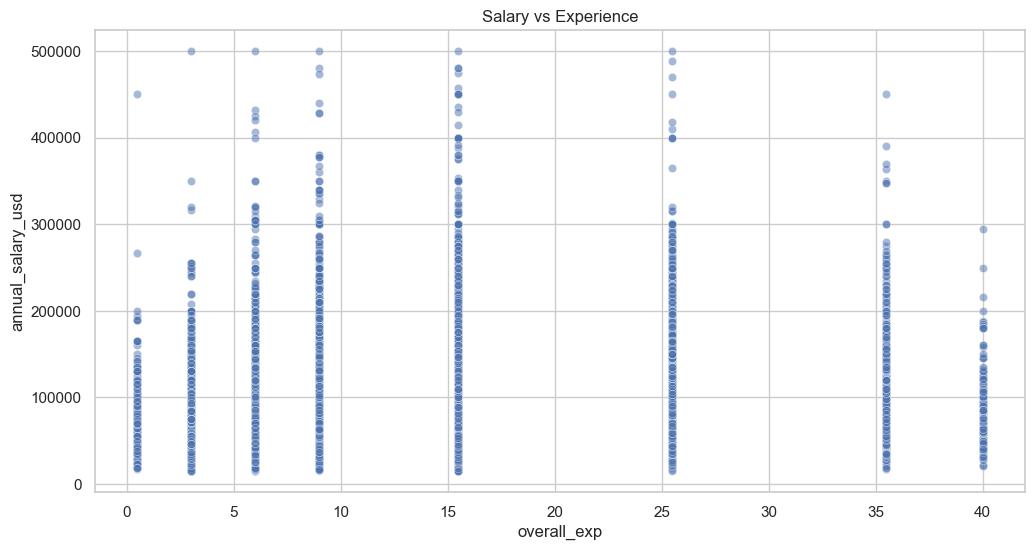

In [128]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    x='overall_exp',
    y='annual_salary_usd',
    data=df_clean,
    alpha=0.5
)
plt.title("Salary vs Experience")
plt.show()

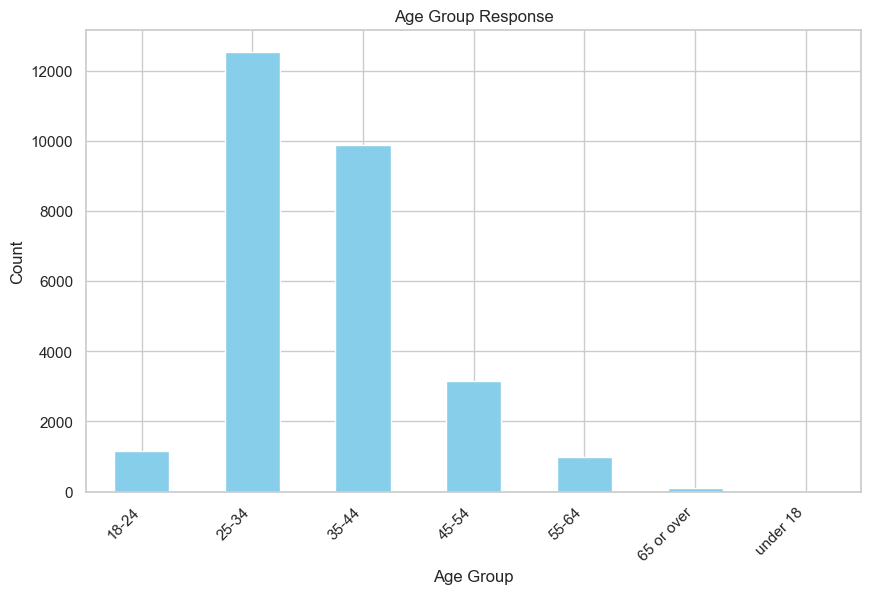

In [129]:
plt.figure(figsize=(10,6))
df_clean['age_group'].value_counts().sort_index().plot(kind = 'bar', color ='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Response')
plt.xticks(rotation = 45, ha ='right')
plt.show()

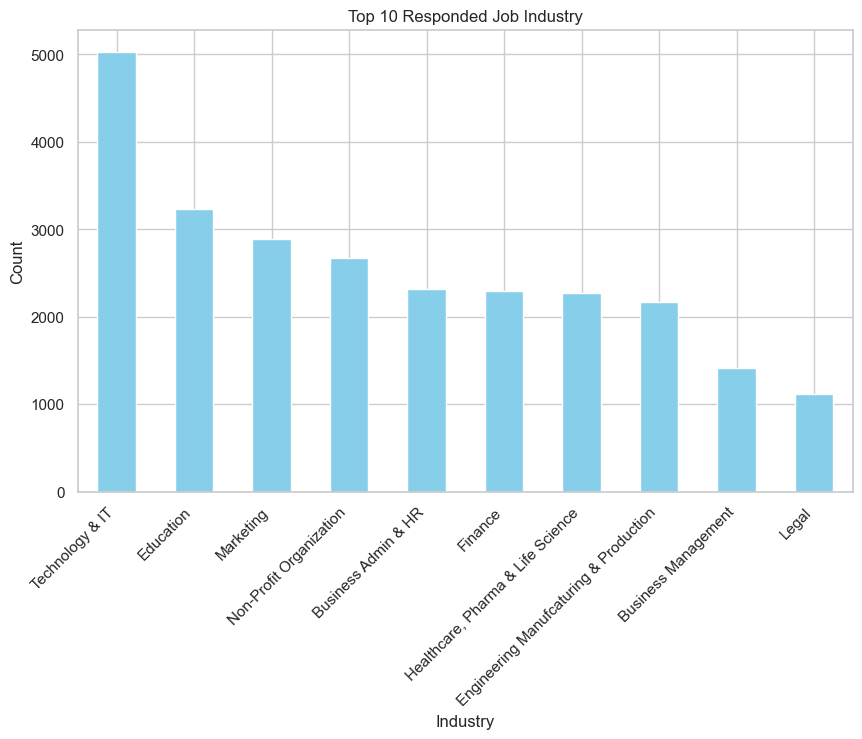

In [130]:
plt.figure(figsize=(10,6))
df_clean['industry'].value_counts().head(10).plot(kind = 'bar', color ='skyblue')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Top 10 Responded Job Industry')
plt.xticks(rotation = 45, ha ='right')
plt.show()

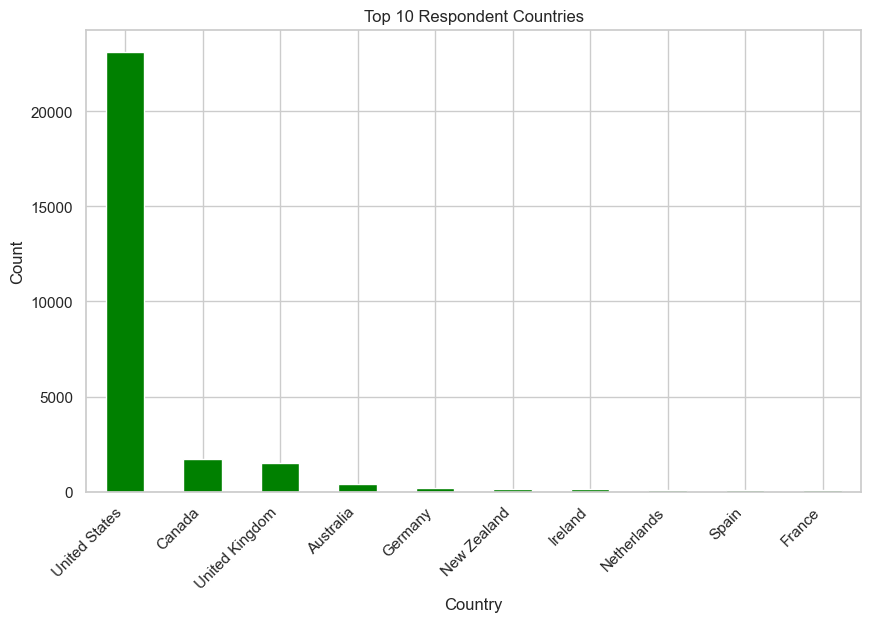

In [131]:
plt.figure(figsize=(10,6))
df_clean['country'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Respondent Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

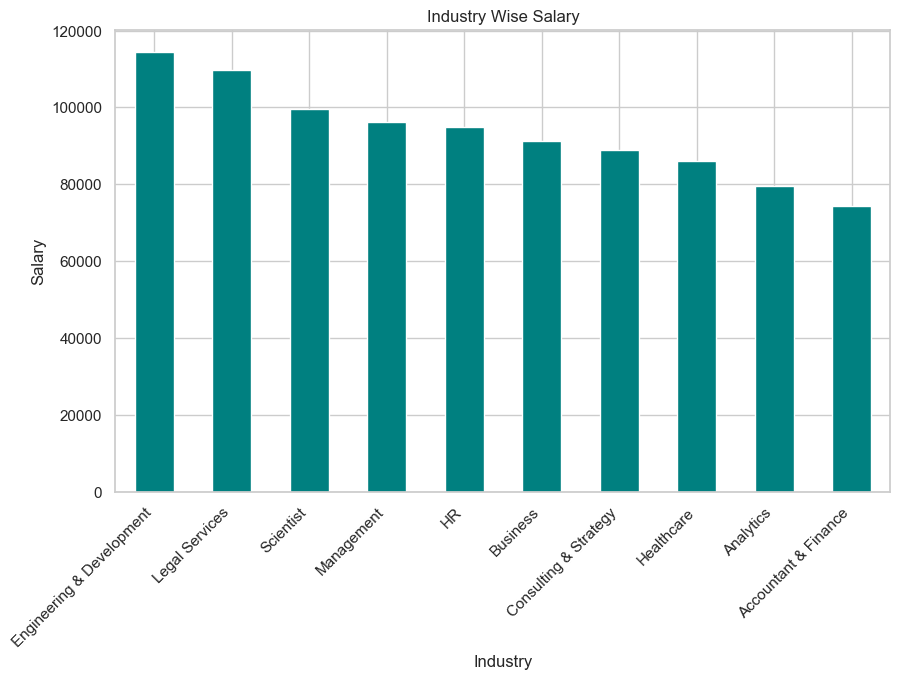

In [194]:
plt.figure(figsize=(10,6))
plt.title("Industry Wise Salary")
df_clean.groupby('job_category')['annual_salary_usd'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='teal')
plt.xlabel("Industry")
plt.ylabel("Salary")
plt.xticks(rotation=45, ha='right')
plt.show()

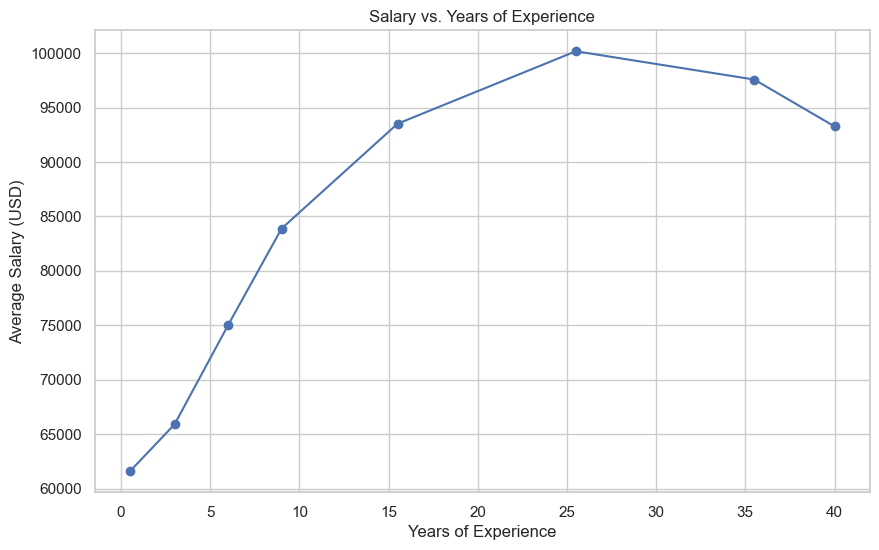

In [133]:
plt.figure(figsize=(10,6))
df_clean.groupby('overall_exp')['annual_salary_usd'].mean().plot(kind='line', marker='o')
plt.title("Salary vs. Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Average Salary (USD)")
plt.show()

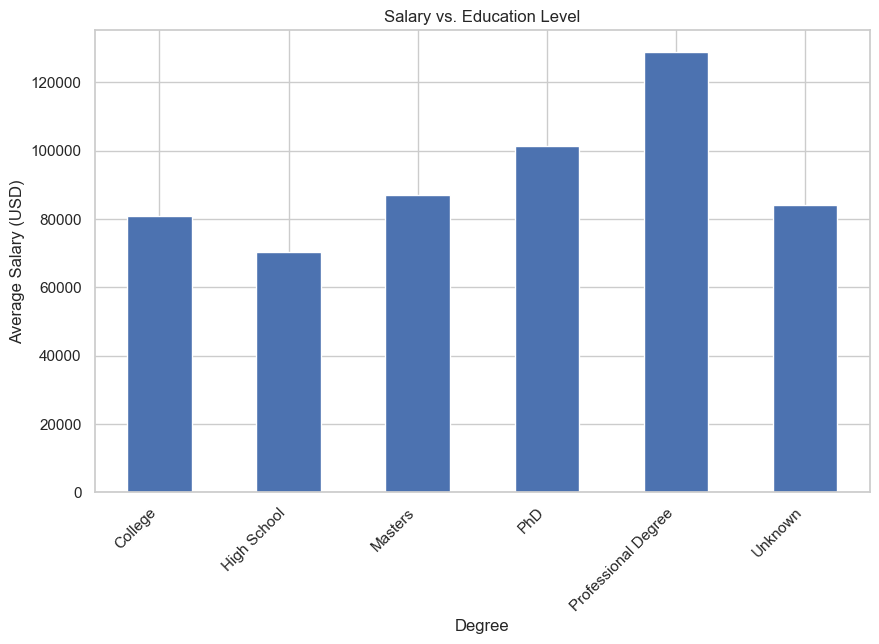

In [134]:
plt.figure(figsize=(10,6))
df_clean.groupby('degree')['annual_salary_usd'].mean().plot(kind='bar')
plt.title("Salary vs. Education Level")
plt.xlabel("Degree")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45, ha='right')
plt.show()

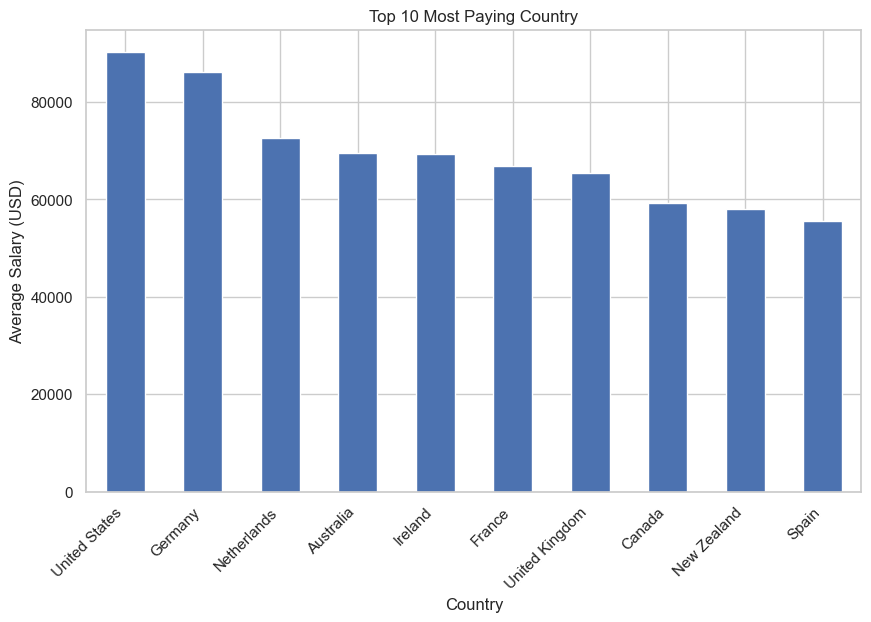

In [135]:
# here i can't do normal group and find the original mean. because
# many countries have very high pay but only appeare few times which will give wrong mean data. we will take data which has more than 50 countries available

country_counts = df_clean['country'].value_counts()
countries_with50 = country_counts[country_counts>=50].index

df_filtered = df_clean[df_clean['country'].isin(countries_with50)]

plt.figure(figsize=(10,6))
df_filtered.groupby('country')['annual_salary_usd'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Most Paying Country")
plt.xlabel("Country")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45, ha='right')
plt.show()

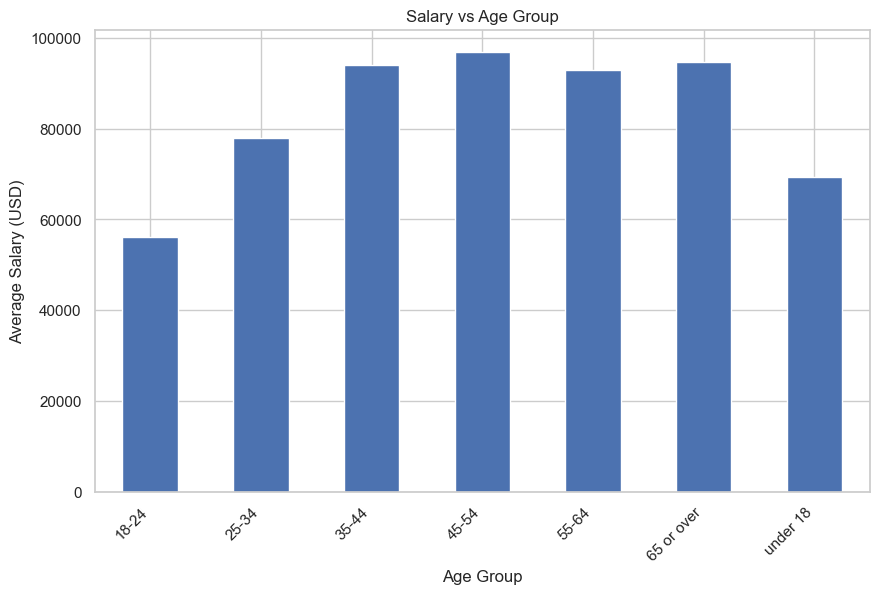

In [26]:
plt.figure(figsize=(10,6))
df_clean.groupby('age_group')['annual_salary_usd'].mean().plot(kind='bar')
plt.title("Salary vs Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45, ha='right')
plt.show()

# Can't use this as you can see under 18 is greater than 18-24 so by checking the value counts you will see that the no of people are very less

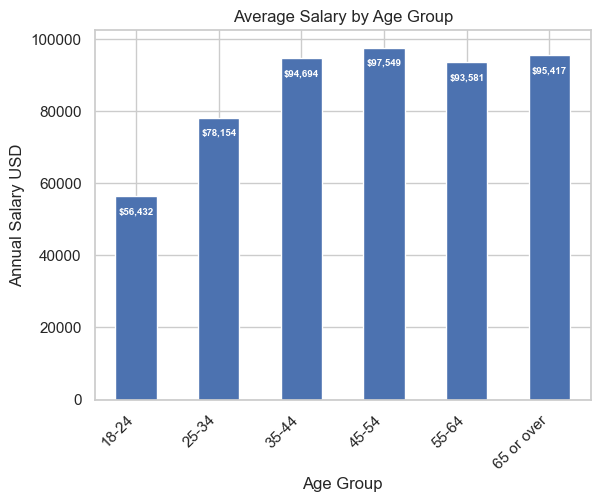

Age Group Analysis

Sample Sizes:
18-24   : 1150 people (avg: 56,432)
25-34   : 12548 people (avg: 78,154)
35-44   : 9872 people (avg: 94,694)
45-54   : 3162 people (avg: 97,549)
55-64   : 975 people (avg: 93,581)
65 or over   : 90 people (avg: 95,417)

Key Insights:
Entry Level (18-24):    $56,432
Peak Level (45-54):    $97,549
Growth from entry to peak: 41,116 (72.9%)


In [136]:
valuec = df_clean['age_group'].value_counts()
df_age_filter = df_clean[df_clean['age_group'].isin(valuec[valuec >= 50].index)]

age_salary = df_age_filter.groupby('age_group')['annual_salary_usd'].mean()
plt.Figure(figsize=(10,6))
age_salary.plot(kind = 'bar')
for i, value in enumerate(age_salary):
    plt.text(i, value - 5000, f'${value:,.0f}', ha='center', fontsize = '7', color = 'white', fontweight = 'bold')

plt.title('Average Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Annual Salary USD')
plt.xticks(rotation = 45, ha = 'right')
plt.show()


agec = df_age_filter['age_group'].value_counts()

print('==='*20)
print('Age Group Analysis')
print('==='*20)

print('\nSample Sizes:')
for age in age_salary.index:
    count = agec[age]
    salary = age_salary[age]
    print(f'{age}   : {count} people (avg: {salary:,.0f})')

print('\nKey Insights:')
print(f'Entry Level (18-24):    ${age_salary['18-24']:,.0f}')
print(f'Peak Level (45-54):    ${age_salary['45-54']:,.0f}')
print(f'Growth from entry to peak: {age_salary['45-54'] - age_salary['18-24']:,.0f} ({(age_salary['45-54']/age_salary["18-24"]-1)*100:.1f}%)')
print('==='*20)


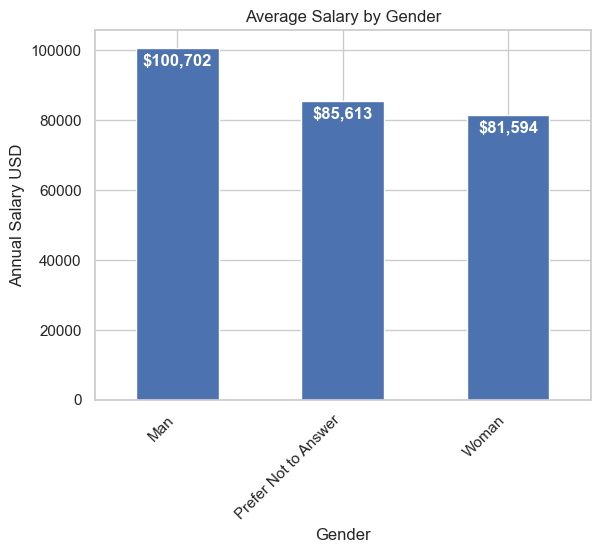

Insights:
Man Earns more than Woman by 23%


In [137]:
plt.Figure(figsize=(10,6))
gender_pay = df_clean.groupby('gender')['annual_salary_usd'].mean()
gender_pay.plot(kind = 'bar')
for i, value in enumerate(gender_pay):
    plt.text(i, value -5000, f'${value:,.0f}', ha='center', fontweight = 'bold', color='white')
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Salary USD')
plt.xticks(rotation = 45, ha = 'right')
plt.show()


print('==='*25)
print('Insights:')
print('==='*25)

if gender_pay['Man'] < gender_pay['Woman']:
    print(f'Woman Earns more than Man by {(gender_pay["Woman"]/gender_pay['Man']-1)*100:.0f}%')
else:
    print(f'Man Earns more than Woman by {(gender_pay["Man"]/gender_pay['Woman']-1)*100:.0f}%')

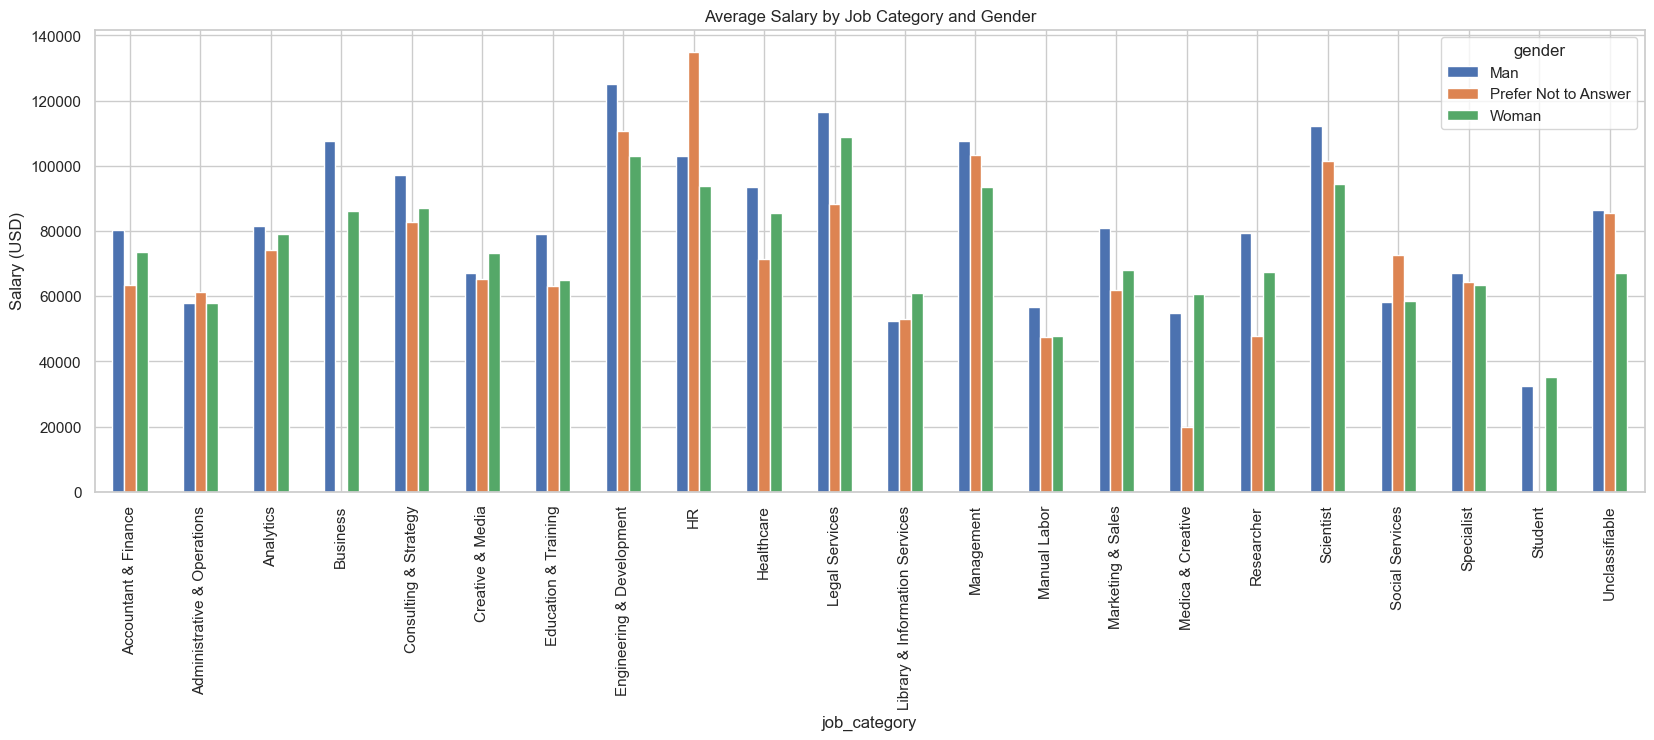

In [207]:
df_clean.groupby(['job_category','gender'])['annual_salary_usd'].mean().unstack().plot(kind='bar', figsize=(20,6))
plt.title("Average Salary by Job Category and Gender")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=90)
plt.show()

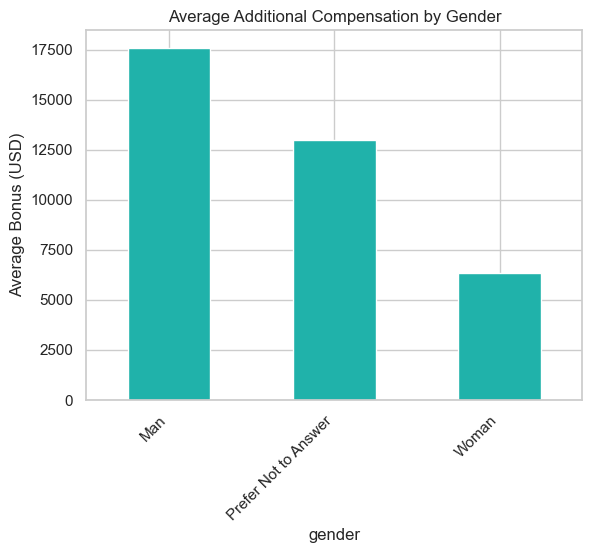

In [139]:
df_clean.groupby('gender')['compensation_usd'].mean().plot(kind='bar', color='lightseagreen')
plt.title("Average Additional Compensation by Gender")
plt.ylabel("Average Bonus (USD)")
plt.xticks(rotation = 45, ha='right')
plt.show()

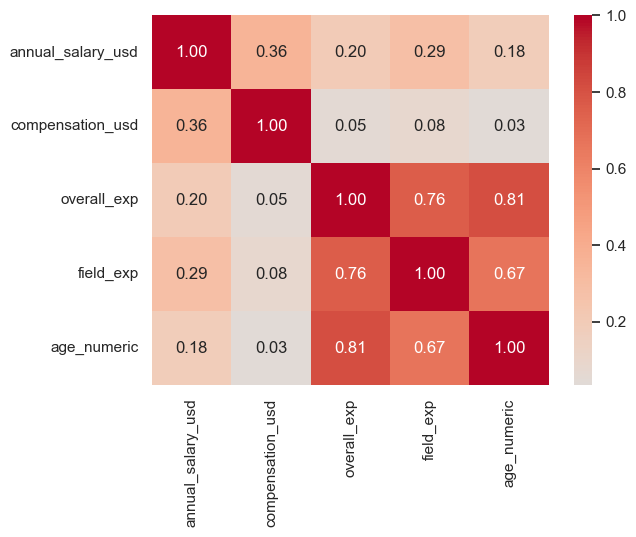

Weak Correlation between Salary and Experience


In [140]:
# print(df_clean.columns[df_clean.dtypes != 'O'])
numeric_cols = ['annual_salary_usd', 'compensation_usd', 'overall_exp', 'field_exp', 'age_numeric']

corr_matrix = df_clean[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.show()
if corr_matrix.loc['annual_salary_usd', 'overall_exp'] > 0.3:
    print("Moderate Positive Correlation between Salary and Experience")
else:
    print("Weak Correlation between Salary and Experience")


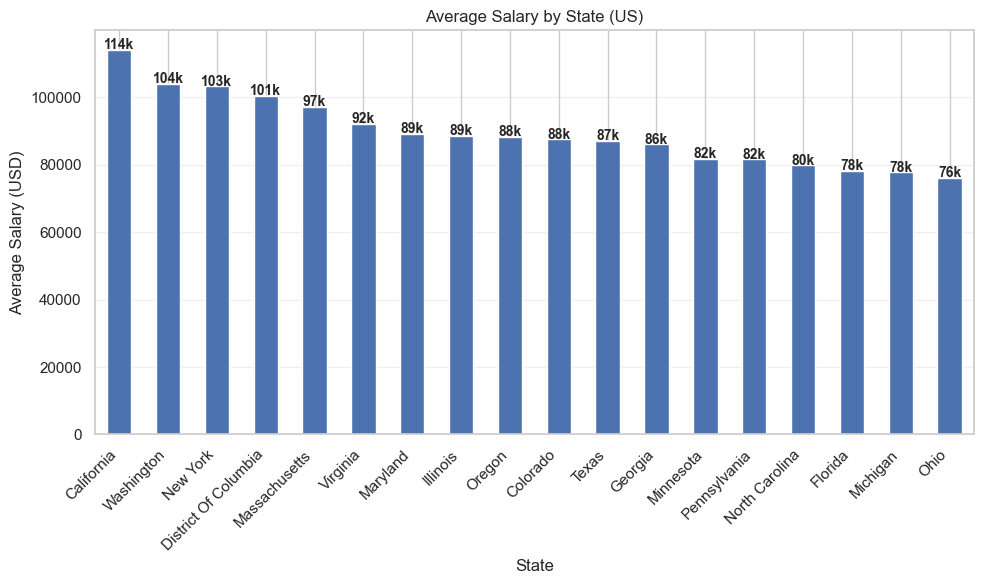

In [141]:
df_us = df_clean[df_clean['country'] == 'United States']
statee = df_us['state'].value_counts()
state_10 = statee[statee >= 500].index
new_filter = df_us[df_us['state'].isin(state_10)]

state_salary = new_filter.groupby('state')['annual_salary_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
state_salary.plot(kind='bar')
for i, value in enumerate(state_salary):
    plt.text(i, value+200, f'{value/1000:.0f}k', ha='center', fontsize = 10, fontweight = 'bold')
plt.title('Average Salary by State (US)')
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [142]:
def assign_career_level(experience):
    if experience < 0:
        return 'Unknown'
    elif experience <= 2:
        return 'Entry Level'
    elif experience <= 5:
        return 'Mid Level'
    elif experience <= 10:
        return 'Senior'
    else:
        return 'Lead/Executive'

df_clean['career_level'] = df_clean['overall_exp'].apply(assign_career_level)

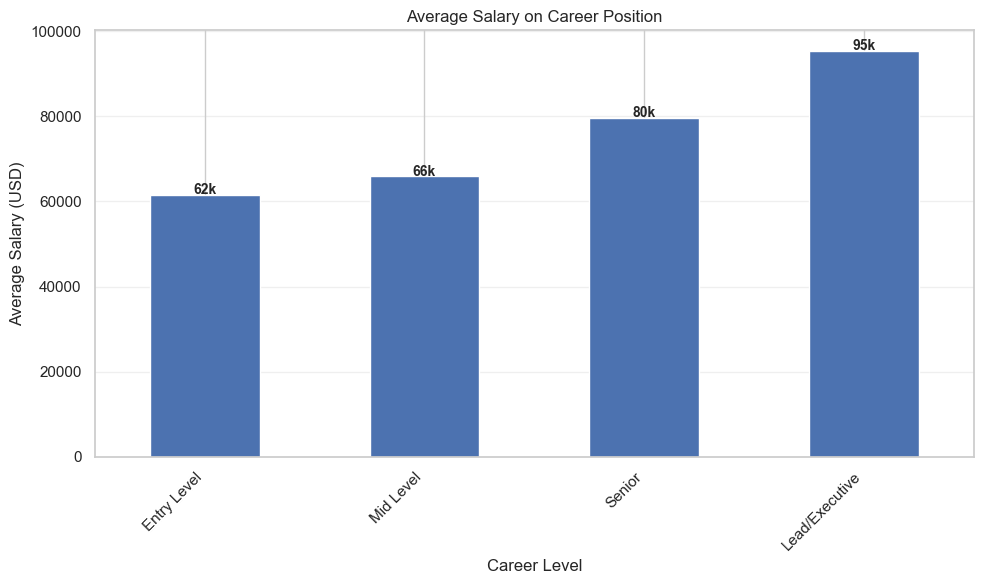

In [143]:
levelsalary = df_clean.groupby('career_level')['annual_salary_usd'].mean().sort_values(ascending=True)

plt.figure(figsize=(10,6))
levelsalary.plot(kind='bar')
for i, value in enumerate(levelsalary):
    plt.text(i, value+200, f'{value/1000:.0f}k', ha='center', fontsize = 10, fontweight = 'bold')
plt.title('Average Salary on Career Position')
plt.xlabel('Career Level', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

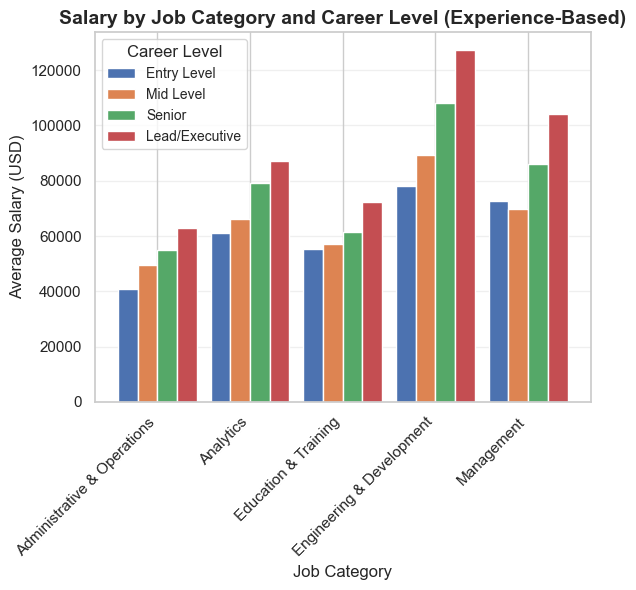

In [144]:
top10_category = df_clean['job_category'].value_counts().head(6).index
new_category = df_clean[df_clean['job_category'].isin(top10_category)]
new_category = new_category[new_category['job_category'] != 'Unclassifiable']

industry_levelwise_salary = new_category.groupby(['job_category', 'career_level'])['annual_salary_usd'].mean().unstack()

level_order = ['Entry Level', 'Mid Level', 'Senior', 'Lead/Executive']
industry_levelwise_salary = industry_levelwise_salary[[col for col in level_order if col in industry_levelwise_salary.columns]]

plt.figure(figsize=(20, 10))
industry_levelwise_salary.plot(kind ='bar', width = 0.85)
plt.title('Salary by Job Category and Career Level (Experience-Based)', fontsize=14, fontweight='bold')
plt.xlabel('Job Category', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Career Level', fontsize=10)
plt.grid(axis='y', alpha=0.3)
# plt.tight_layout()
plt.show()


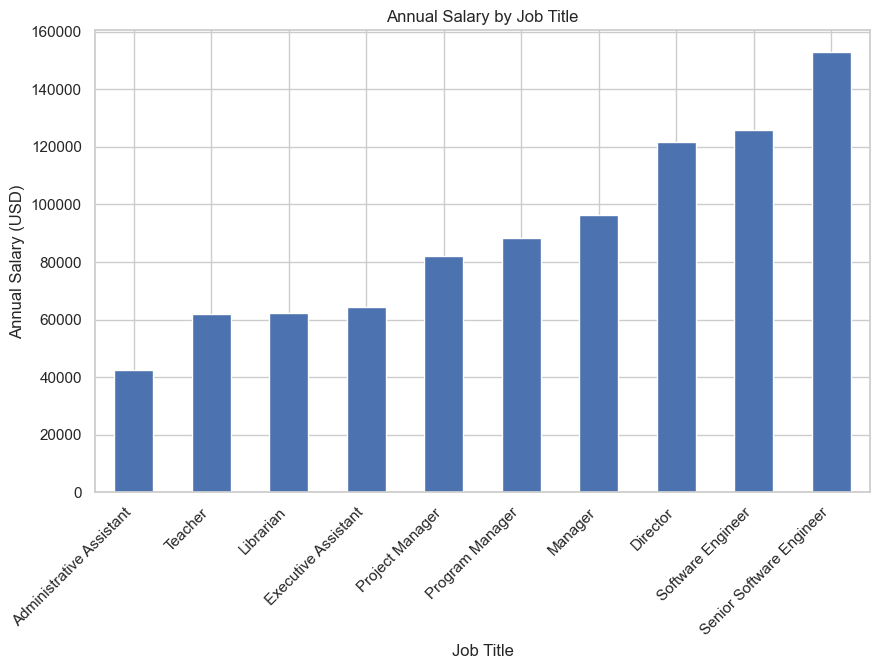

In [157]:
jobtitle = df_clean['job_title'].value_counts().head(10).index
jobtitle
jobtitle_df = df_clean[df_clean['job_title'].isin(jobtitle)]

title_salary = jobtitle_df.groupby('job_title')['annual_salary_usd'].mean().sort_values()

plt.figure(figsize=(10,6))
title_salary.plot(kind='bar')
plt.title('Annual Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Annual Salary (USD)')
plt.xticks(rotation = 45, ha ='right')
plt.show()

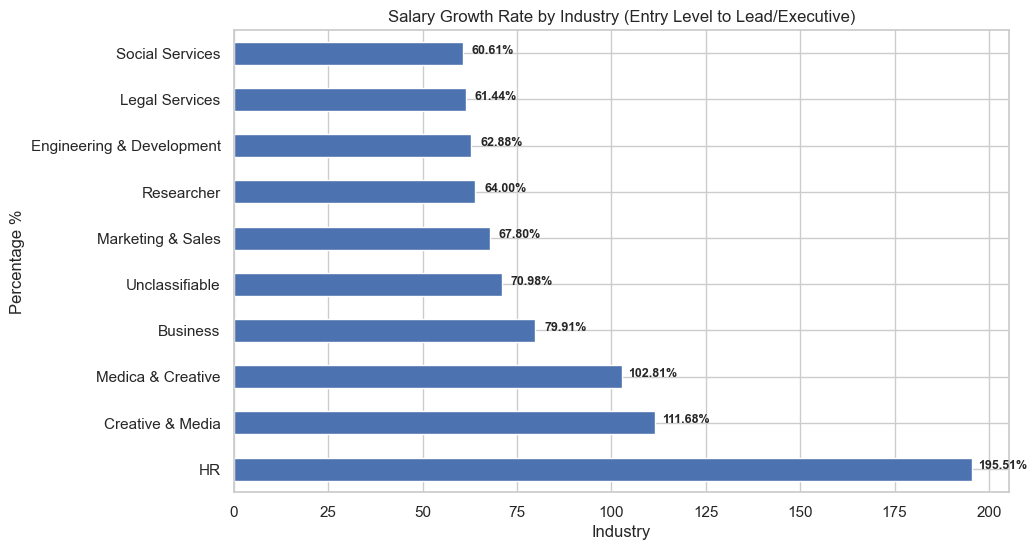

In [193]:
# I want to find out the salary growth rate by industry

df_clean['job_category'].value_counts().head(10)

industry_growth = df_clean.groupby(['job_category', 'career_level'])['annual_salary_usd'].mean().unstack()
industry_growth['growth_rate'] = ((industry_growth['Lead/Executive'] - industry_growth['Entry Level']) / industry_growth['Entry Level'] *100)
top_growth = industry_growth['growth_rate'].sort_values(ascending=False).head(10)
plt.figure(figsize = (10,6))
top_growth.plot(kind='barh')
for i, value in enumerate(top_growth):
    plt.text(value+8, i, f'{value:.2f}%', ha='center', fontsize = 9, fontweight = 'bold')
plt.title('Salary Growth Rate by Industry (Entry Level to Lead/Executive)')
plt.xlabel('Industry')
plt.ylabel('Percentage %')
plt.show()


In [198]:
df_clean['industry'].unique()
df_clean['job_category'].unique()

array(['Management', 'Marketing & Sales',
       'Library & Information Services', 'Administrative & Operations',
       'Analytics', 'Accountant & Finance', 'Legal Services',
       'Specialist', 'Creative & Media', 'Researcher',
       'Engineering & Development', 'Consulting & Strategy',
       'Education & Training', 'Scientist', 'Student', 'Unclassifiable',
       'Business', 'Social Services', 'Manual Labor', 'Medica & Creative',
       'Healthcare', 'HR'], dtype=object)

In [ ]:
df_clean.head

,timestamp,age_group,industry,job_title,annual_salary_usd,compensation_usd,currency,country,state,city,overall_exp,field_exp,degree,gender,job_category,level,year,month,age_numeric,career_level
0,2021-04-27 11:02:10,25-34,Education,Research And Instruction Librarian,"55,000.00",0.00,USD,United States,Massachusetts,Boston,6.00,6.00,Masters,Woman,Management,Not Classified,2021,4,29.50,Senior
1,2021-04-27 11:02:22,25-34,Technology & IT,Change & Internal Communications Manager,"72,897.00","5,340.00",GBP,United Kingdom,N/A,Cambridge,9.00,6.00,College,Man,Management,Not Classified,2021,4,29.50,Senior
2,2021-04-27 11:02:38,25-34,Finance,Marketing Specialist,"34,000.00",0.00,USD,United States,Tennessee,Chattanooga,3.00,3.00,College,Woman,Marketing & Sales,Not Classified,2021,4,29.50,Mid Level
3,2021-04-27 11:02:41,25-34,Non-Profit Organization,Program Manager,"62,000.00","3,000.00",USD,United States,Wisconsin,Milwaukee,9.00,6.00,College,Woman,Management,Not Classified,2021,4,29.50,Senior
4,2021-04-27 11:02:42,25-34,Finance,Accounting Manager,"60,000.00","7,000.00",USD,United States,South Carolina,Greenville,9.00,6.00,College,Woman,Management,Not Classified,2021,4,29.50,Senior


In [ ]:
columns_to_drop = [
    'timestamp',
    'industry',      
    'level',    
    'year',          
    'month',       
    'age_numeric'   
]

df_clean = df_clean.drop(columns=columns_to_drop, errors='ignore')

print(f"Remaining columns: {df_clean.shape[1]}")
print(df_clean.columns.tolist())


Remaining columns: 14
['age_group', 'job_title', 'annual_salary_usd', 'compensation_usd', 'currency', 'country', 'state', 'city', 'overall_exp', 'field_exp', 'degree', 'gender', 'job_category', 'career_level']


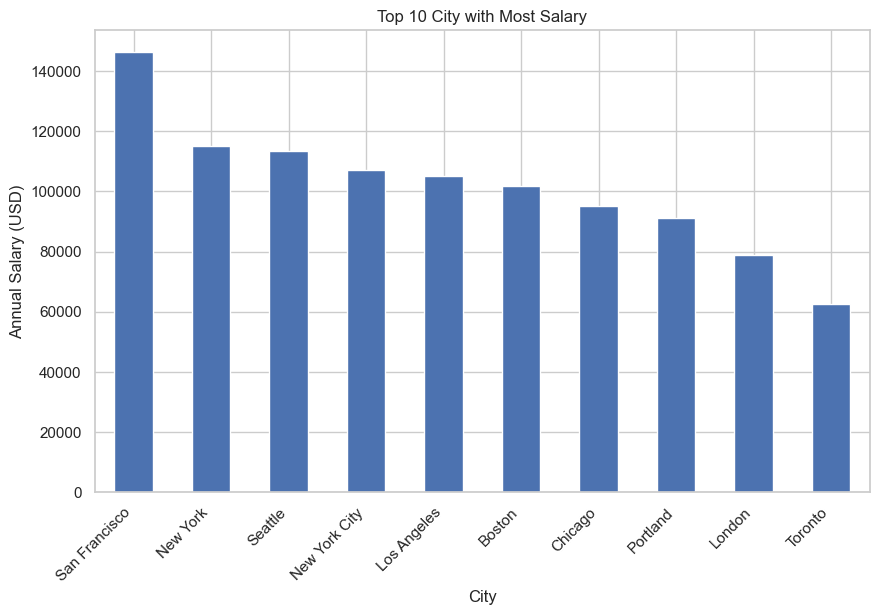

In [208]:
top_city = df_clean['city'].value_counts().head(10).index

top_city_salary = df_clean[df_clean['city'].isin(top_city)]

plt.figure(figsize = (10,6))
plt.title('Top 10 City with Most Salary')
top_city_salary.groupby('city')['annual_salary_usd'].mean().sort_values(ascending = False).plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Annual Salary (USD)')
plt.xticks(rotation = 45, ha='right')
plt.show()

In [206]:
df_clean.to_csv('project_cleaned_v2.0.csv', index=False)